In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [2]:
from buildTest import getRegData, getClassiData
Xr_train,Xr_val,yr_train,yr_val = getRegData()
Xc_train,Xc_val,yc_train,yc_val = getClassiData()

In [3]:
os.chdir('../..')

In [4]:
from MLfromScratch.neighbors import KNeighborsRegressor
from MLfromScratch.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
knr = KNeighborsRegressor(n_neighbors=5,normalize=True)
knr.fit(Xr_train,yr_train)
knr.score(Xr_val,yr_val)

0.8106468587135003

In [5]:
print(r2_score( yr_val, knr.predict(Xr_val) ))
print(root_mean_squared_error(yr_val, knr.predict(Xr_val)))

0.8106468587135003
3.6746866334838177


In [6]:
from MLfromScratch.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=50)
knc.fit(Xc_train,yc_train)
knc.score(Xc_val,yc_val)

0.9907834101382489

In [7]:
from MLfromScratch.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
y_true = yc_val
y_pred = knc.predict(Xc_val)
y_score = knc.predict_proba(Xc_val)[:,1]
print(accuracy_score(y_true,y_pred))
confusion_matrix(y_true,y_pred)

0.9907834101382489


array([[230,   4],
       [  0, 200]])

0.9997863247863248

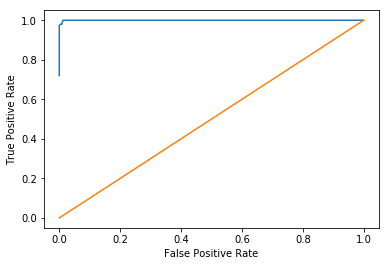

In [8]:
roc_curve(y_true,y_score,plot=True)
roc_auc_score(y_true,y_score)

In [9]:
from MLfromScratch.metrics import precision_score, recall_score, sensitivity_score, specificity_score, f1_score
precision_score(y_true,y_pred,), recall_score(y_true,y_pred), sensitivity_score(y_true,y_pred), specificity_score(y_true,y_pred), f1_score(y_true,y_pred)

(0.9803921568627451, 1.0, 1.0, 0.9829059829059829, 0.99009900990099)